# Background Data


The nonprofit foundation Alphabet Soup wants a tool that can help it select the applicants for funding with the best chance of success in their ventures. With your knowledge of machine learning and neural networks, you’ll use the features in the provided dataset to create a binary classifier that can predict whether applicants will be successful if funded by Alphabet Soup.From Alphabet Soup’s business team, you have received a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years.

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN'], axis=1)

In [3]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [4]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at NAME counts for binning
counts1 = application_df['NAME'].value_counts()
counts1

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [6]:
# use the variable name names_replace
names_replace = list(counts1[counts1<5].index)
names_replace


['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

# Binning

In [12]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts for binning
counts = aapplication_df['APPLICATION_TYPE'].value_counts()
counts

NameError: name 'aapplication_df' is not defined

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

In [10]:
# Look at CLASSIFICATION value counts for binning
counts_binning = application_df['CLASSIFICATION'].value_counts()
counts_binning

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = counts_binning[counts_binning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (counts_binning[counts_binning<100].index)
classifications_to_replace

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [18]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
# drop 'IS SUCCESSFUL'
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [22]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 3171      
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 3,298
Trainable params: 3,298
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 1s 1ms/step - loss: 0.5451 - accuracy: 0.7393 - val_loss: 0.4653 - val_accuracy: 0.7782
Epoch 2/100
684/684 [==============================] - 1s 954us/step - loss: 0.4604 - accuracy: 0.7802 - val_loss: 0.4491 - val_accuracy: 0.7909
Epoch 3/100
684/684 [==============================] - 1s 960us/step - loss: 0.4466 - accuracy: 0.7865 - val_loss: 0.4449 - val_accuracy: 0.7922
Epoch 4/100
684/684 [==============================] - 1s 994us/step - loss: 0.4411 - accuracy: 0.7904 - val_loss: 0.4455 - val_accuracy: 0.7867
Epoch 5/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.7905 - val_loss: 0.4465 - val_accuracy: 0.7927
Epoch 6/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4350 - accuracy: 0.7925 - val_loss: 0.4433 - val_accuracy: 0.7911
Epoch 7/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.7939 - val_loss: 0.4439 - val_accuracy: 

Epoch 58/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8013 - val_loss: 0.4513 - val_accuracy: 0.7963
Epoch 59/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8017 - val_loss: 0.4516 - val_accuracy: 0.7950
Epoch 60/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8013 - val_loss: 0.4510 - val_accuracy: 0.7968
Epoch 61/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8018 - val_loss: 0.4529 - val_accuracy: 0.7974
Epoch 62/100
684/684 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8011 - val_loss: 0.4528 - val_accuracy: 0.7950
Epoch 63/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4166 - accuracy: 0.8018 - val_loss: 0.4529 - val_accuracy: 0.7981
Epoch 64/100
684/684 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8023 - val_loss: 0.4523 - val_accuracy:

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4647 - accuracy: 0.7836 - 311ms/epoch - 1ms/step
Loss: 0.4647299349308014, Accuracy: 0.7835568785667419


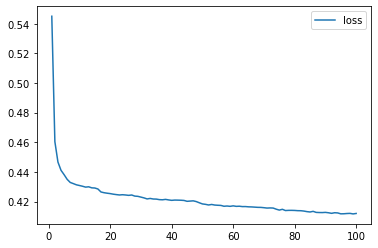

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

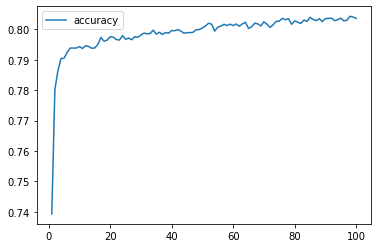

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Export our model to HDF5 file
nn.save('/content/Model_2.h5')